In [17]:
import pandas as pd
import yfinance as yf
import numpy as np
import pandas_ta as ta

In [18]:
data = yf.download( "^SET.BK" , period  = '10y' , interval = '1d' , group_by =  'columns' )
data.fillna( method = 'ffill' , inplace = True )

[*********************100%***********************]  1 of 1 completed


In [22]:
macd  = ta.macd( data.Open , append = True )

<AxesSubplot:xlabel='MACDh_12_26_9', ylabel='Count'>

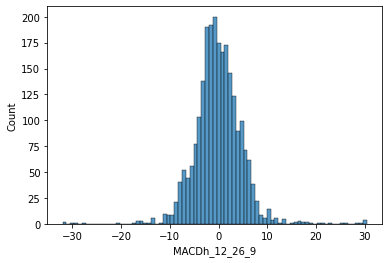

In [23]:
import seaborn  as sns
sns.histplot( macd['MACDh_12_26_9'] )

In [34]:
data['MACDh_12_26_9'] = macd['MACDh_12_26_9']

data['mean'] = macd['MACDh_12_26_9'].mean()
data['std'] = macd['MACDh_12_26_9'].std()
data['-1sd'] = data['mean'] -  data['std']
data['+1sd'] = data['mean'] + data['std']
data['-2sd'] =  data['mean'] - data['std']*2
data['+2sd'] =  data['mean'] + data['std']*2

<AxesSubplot:xlabel='Date'>

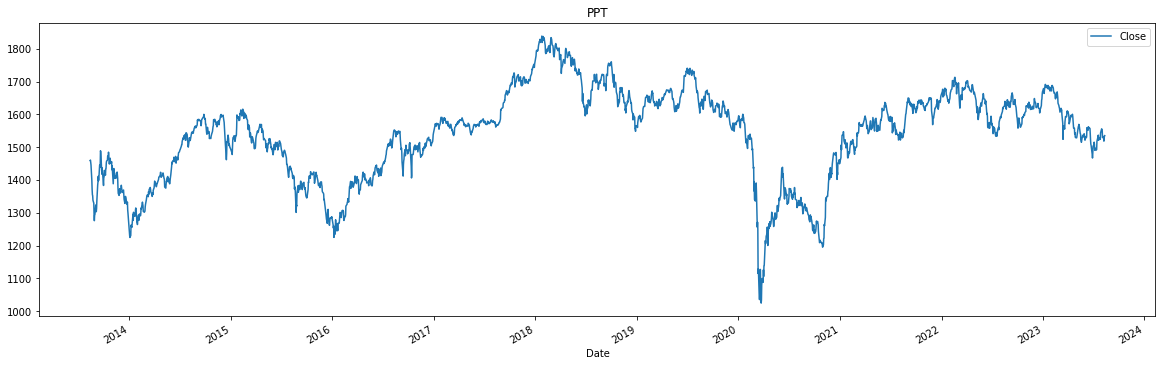

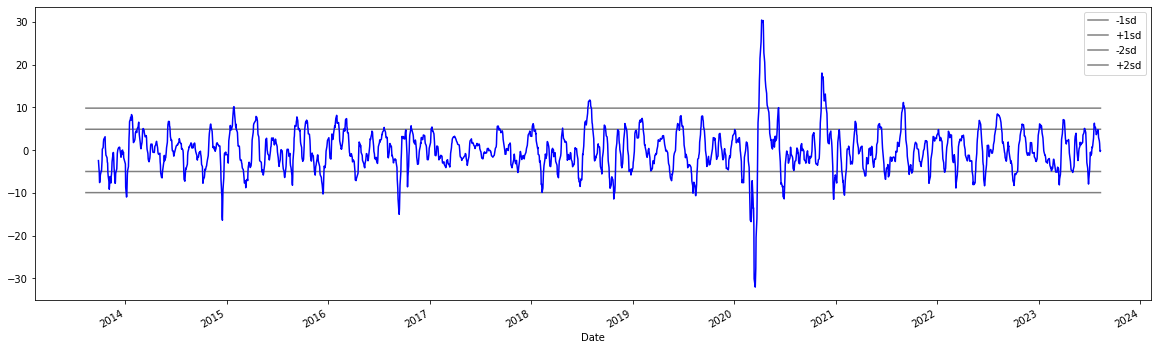

In [36]:
data.plot( y = ['Close'] , figsize = (20,6) , title = 'PPT' )
data.plot(  y = ['-1sd','+1sd','-2sd','+2sd'] ,  figsize=(20,6) , color = 'grey')
# data.plot(  y = ['Open'] )
macd['MACDh_12_26_9'].plot(  color = 'b' )